#               1. House Price Prediction using Ad. Linear Regression

# Importing Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Load Dataset

In [2]:
df1=pd.read_csv("housedataset.csv")
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df=df1.copy()

In [4]:
#Shape of train data
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_num = df.select_dtypes(exclude=['object'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
df_catg = df.select_dtypes(include=['object'])
df_catg.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
y= pd.DataFrame(df["SalePrice"])
#y.shape

In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
df= df.drop(["Id"],axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Analysis on Target Variable

The saleprice has appreciable positive skewness, deviates from the normal distribution and shows peakedness.  Now, we need to tranform this variable and make it normal distribution.

C:\Users\Karan Singh\AppData\Local\Temp\ipykernel_19392\691938537.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"],fit=stats.norm)


<Axes: xlabel='SalePrice', ylabel='Density'>

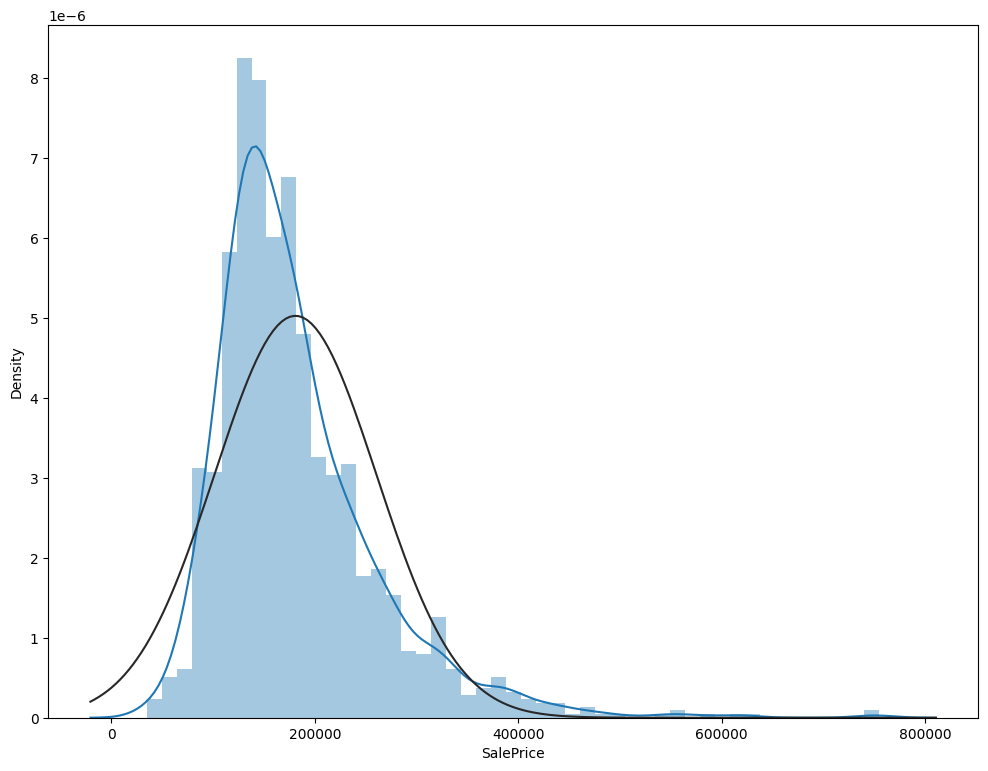

In [13]:
plt.subplots(figsize=(12,9))
sns.distplot(df["SalePrice"],fit=stats.norm)

In [14]:
(mu,sigma)=stats.norm.fit(df["SalePrice"])
mu,sigma

(180921.19589041095, 79415.29188606751)

<function matplotlib.pyplot.show(close=None, block=None)>

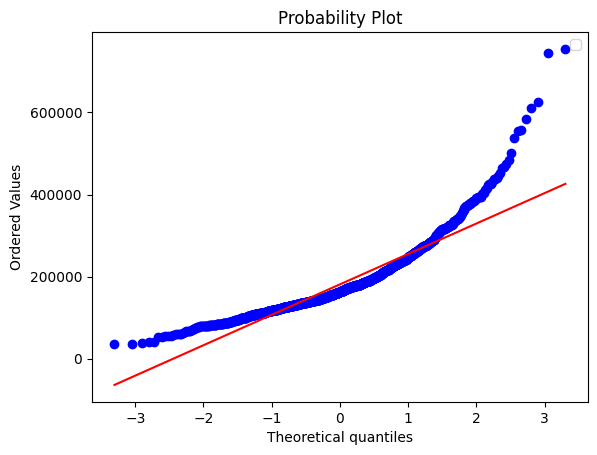

In [15]:
#plot wih distribution
plt.legend(["normal.dist.($/mu-${:.2f}and($/sigma-${:.2f}".format(mu,sigma)],loc="best")
plt.ylabel("frequency")
fig = plt.figure
stats.probplot(df["SalePrice"],plot=plt)
plt.show

Here we use log for target variable to make more normal distribution

C:\Users\Karan Singh\AppData\Local\Temp\ipykernel_19392\1975178241.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"],fit=stats.norm)


<Axes: xlabel='SalePrice', ylabel='Density'>

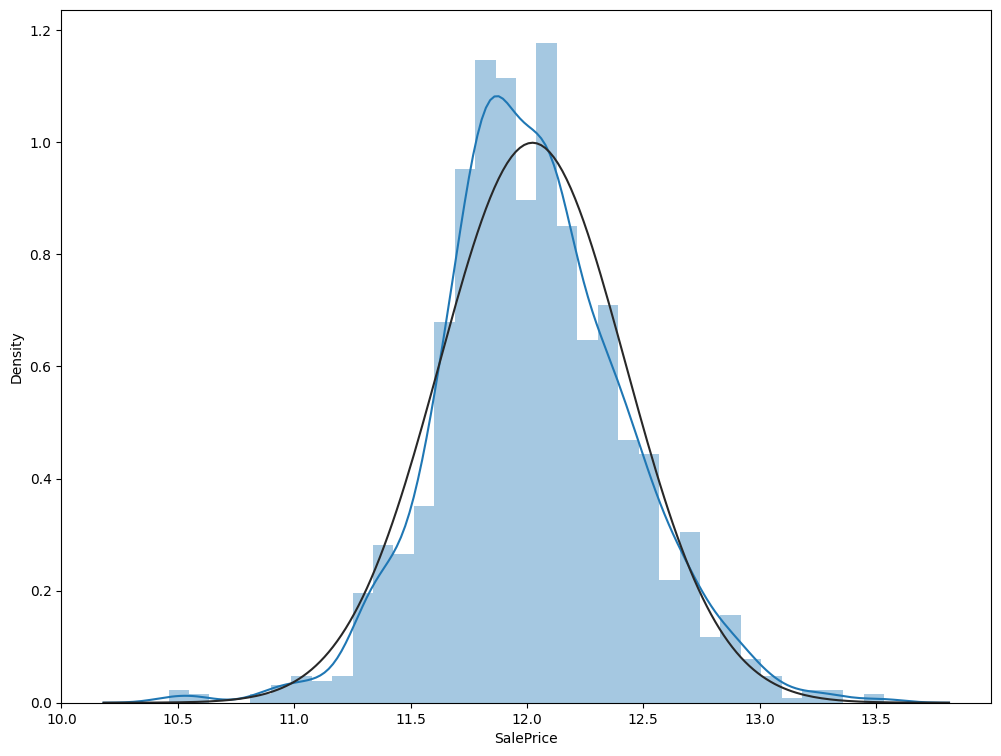

In [16]:
df["SalePrice"] = np.log1p(df["SalePrice"])
#check again for normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(df["SalePrice"],fit=stats.norm)

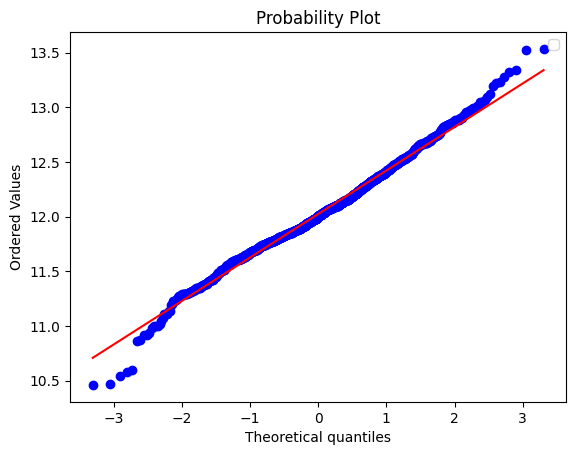

In [17]:
mu,sigma=stats.norm.fit(df["SalePrice"])
#plot with distribution
plt.legend(["normal dist.($\mu=${:.2f}and$\sigma=${:2f}".format(mu,sigma)],loc="best")
fig=plt.figure
stats.probplot(df["SalePrice"],plot=plt)
plt.show()

# Bivariate Analysis

(-0.5, 111.5, 0.0, 755000.0)

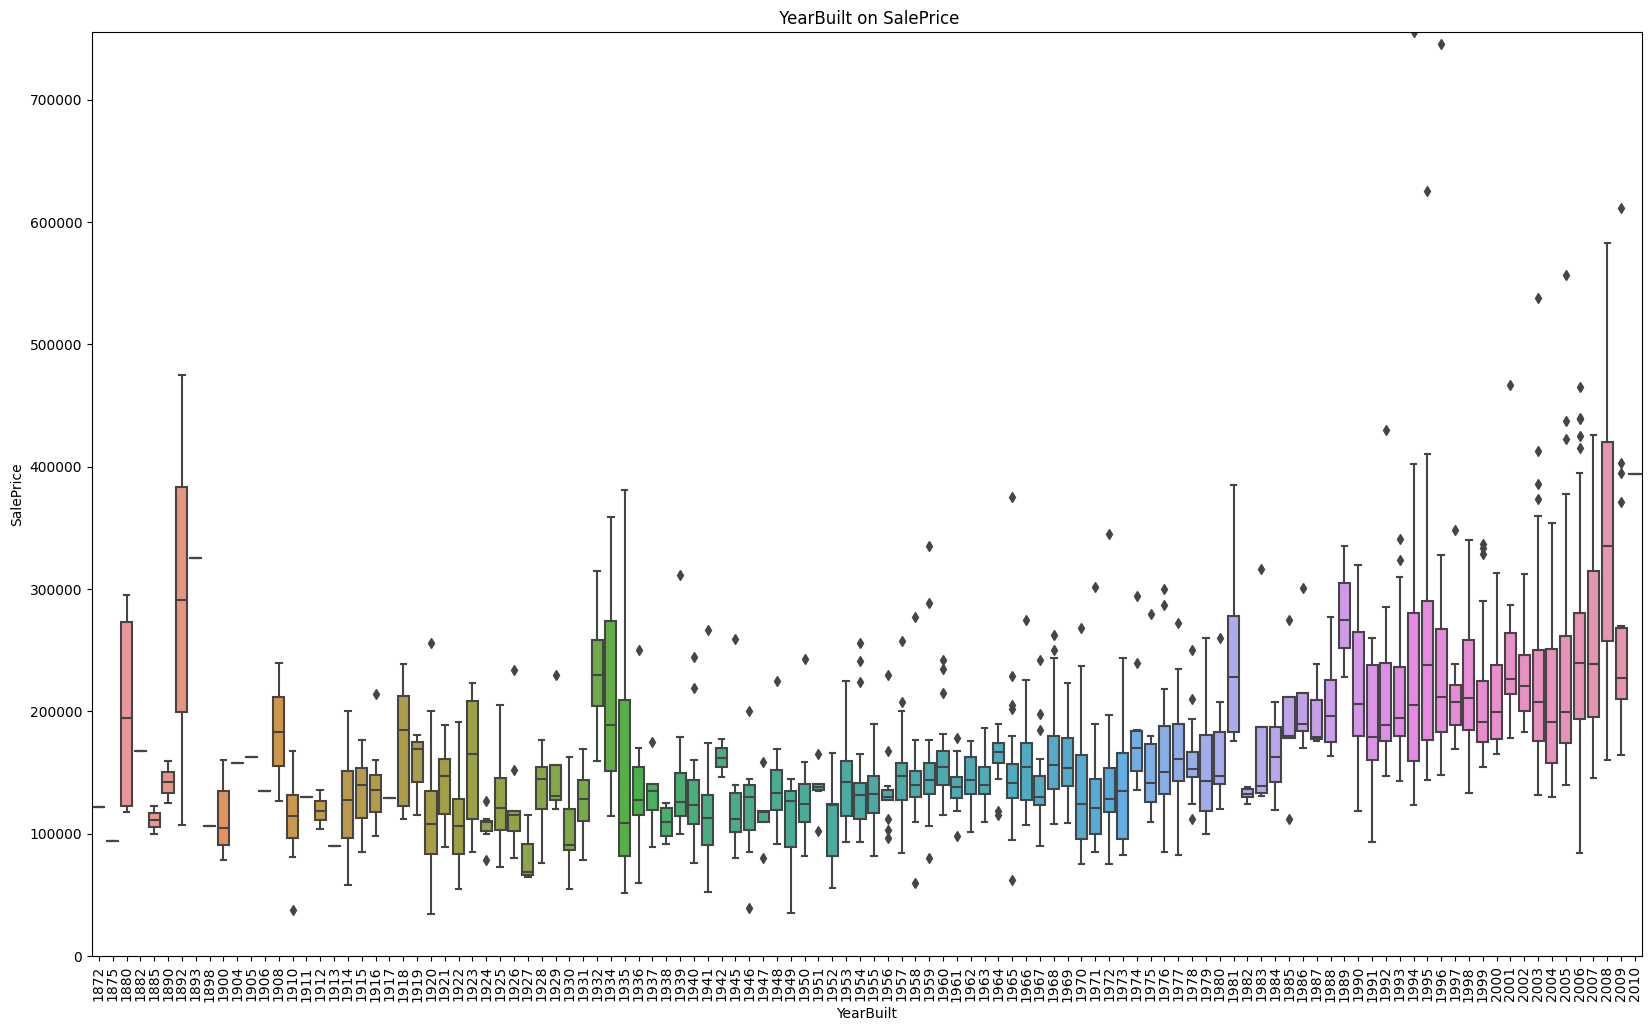

In [18]:
var = "YearBuilt"
data = pd.concat([y, df[var]], axis=1)
f,ax = plt.subplots(figsize =(20,12))
plt.xticks(rotation=90)
fig = sns.boxplot(x=var,y="SalePrice",data=data)
plt.title(" YearBuilt on SalePrice")
fig.axis(ymin=0,ymax=755000)

There is no much big impact of year Built on SalePrice

(-0.5, 3.5, 0.0, 755000.0)

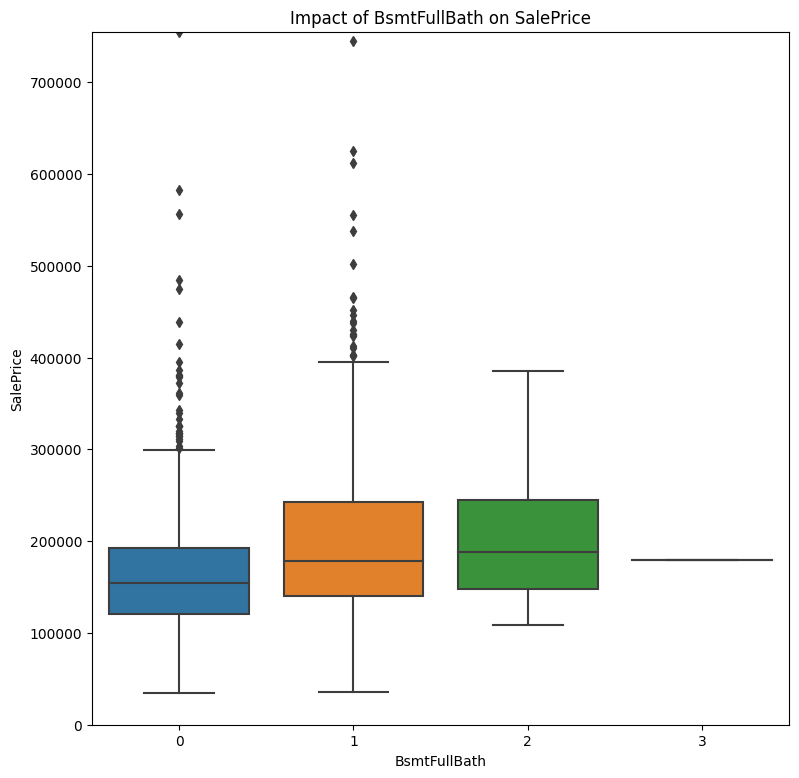

In [19]:
var = "BsmtFullBath"
data = pd.concat([y, df[var]], axis=1)
f,ax = plt.subplots(figsize=(9,9))
fig = sns.boxplot(x=var,y="SalePrice",data=data)
plt.title("Impact of BsmtFullBath on SalePrice")
fig.axis(ymin=0,ymax=755000)

(-0.5, 9.5, 0.0, 755000.0)

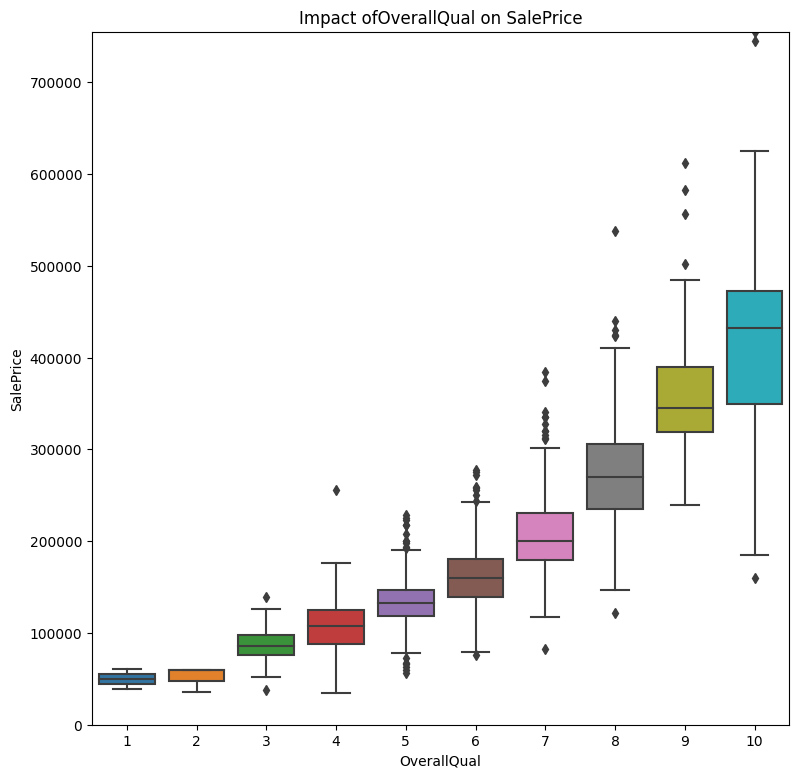

In [20]:
var = "OverallQual"
data = pd.concat([y, df[var]], axis=1)
f,ax = plt.subplots(figsize=(9,9))
fig = sns.boxplot(x=var,y="SalePrice",data=data)
plt.title("Impact ofOverallQual on SalePrice")
fig.axis(ymin=0,ymax=755000)

The above plot clearly suggest that if the Overall Qualities are high, the Sale prices is also increases.

(-0.5, 3.5, 0.0, 755000.0)

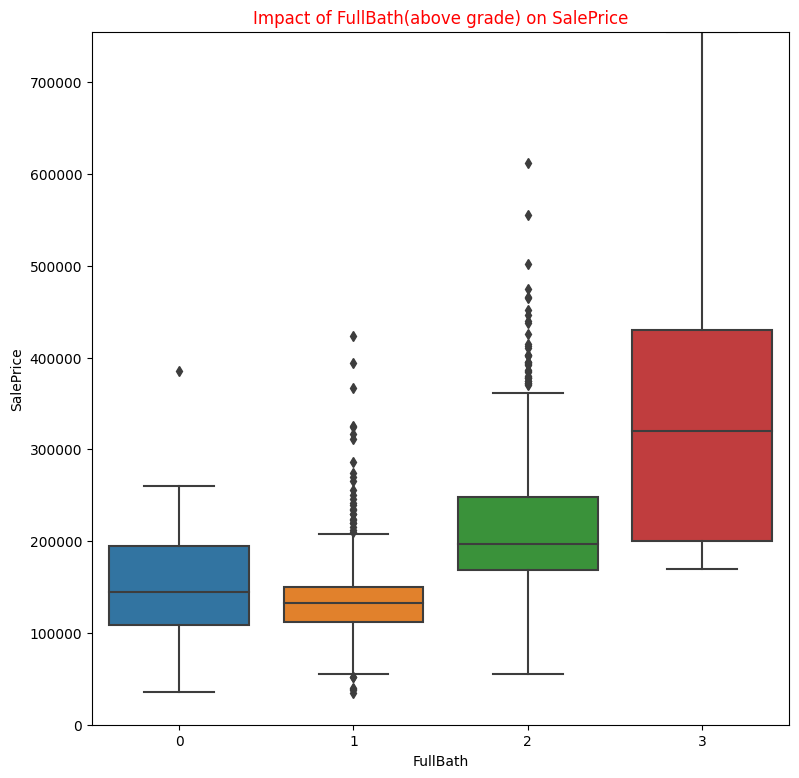

In [21]:
var = "FullBath"
data = pd.concat([y, df[var]], axis=1)
f,ax = plt.subplots(figsize=(9,9))
fig = sns.boxplot(x=var,y="SalePrice",data=data)
plt.title("Impact of FullBath(above grade) on SalePrice",color ="red")
fig.axis(ymin=0,ymax=755000)

The above graph shows that if number of bathroom increases then sale price also increases.

(-0.5, 11.5, 0.0, 755000.0)

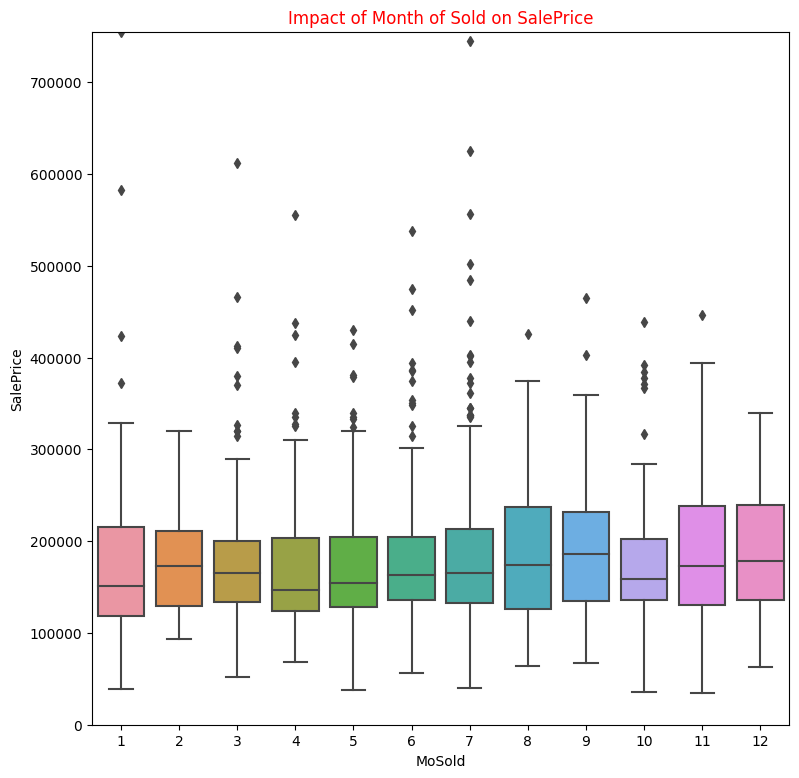

In [22]:
var = "MoSold"
data = pd.concat([y, df[var]], axis=1)
f,ax = plt.subplots(figsize=(9,9))
fig = sns.boxplot(x=var,y="SalePrice",data=data)
plt.title("Impact of Month of Sold on SalePrice",color ="red")
fig.axis(ymin=0,ymax=755000)

Month of sold does not impact on sale price.

# Time Series Analysis

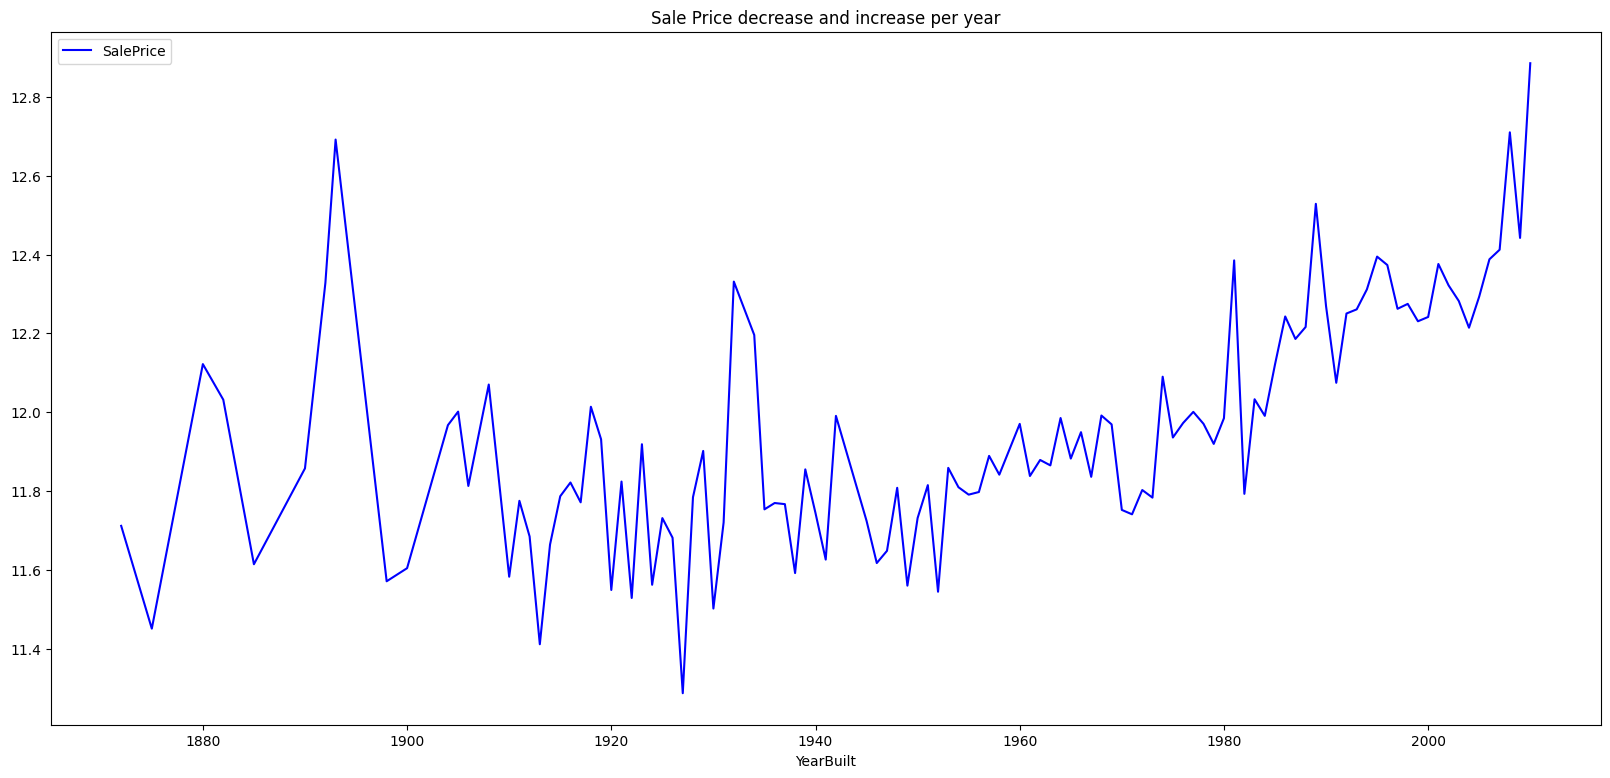

In [23]:
data1 = df[["YearBuilt","SalePrice"]].groupby(["YearBuilt"],as_index = True).mean().plot(figsize= (20,9),color = "blue")
plt.title("Sale Price decrease and increase per year")
plt.show()
time = data1.get_figure()
time.savefig("Time.png")

# Find The Missing Value

In [24]:
## First lets handle Categorical features of train data which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))
    

Alley: 0.9377% missing values
MasVnrType: 0.5973% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [25]:
## Replace missing value with a new label for train data
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df=replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [26]:
## Replace missing value with a new label for test data
def replace_cat_feature(df_test,features_nan):
    data=df_test.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df_test=replace_cat_feature(df,features_nan)

df_test[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [27]:
## Now lets check for numerical variables of train data that contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))


LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [28]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

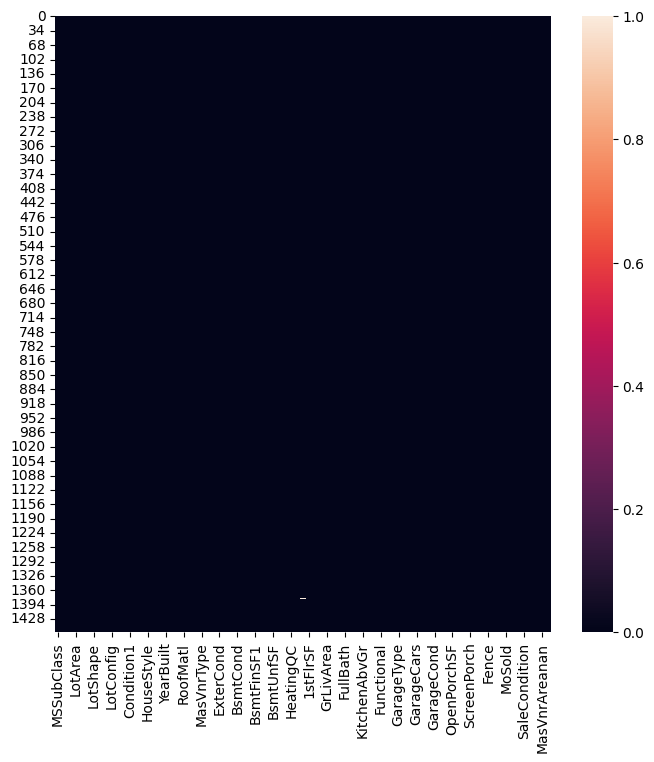

In [29]:
#Missing value in train data
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())
plt.show()

In [30]:
col = df_catg.columns
col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder
for c in col:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# Preparing data for prediction

In [32]:
#Take targate variable into y
y = df['SalePrice']

In [33]:
#Delete the saleprice
del df['SalePrice']

In [34]:
#Take their values in X and y
X = df.values
y = y.values

In [35]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Linear Regression

In [36]:
X_train.shape,y_train.shape

((1168, 82), (1168,))

In [37]:
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
def errorScore(pred_y,y_test):
    result = []
    exp_var = "Explained variance of model: %.2f" %explained_variance_score(pred_y,y_test)
    R2_score = "R-square result: %.2f" %r2_score(pred_y,y_test)
    mse = "Mean squard error: %.2f" %mean_squared_error(pred_y,y_test)
    rmse = "RMSE: %2f" %np.sqrt(mean_squared_error(pred_y,y_test))
    result.append(exp_var)
    result.append(R2_score)
    result.append(mse)
    result.append(rmse)
    return result

In [39]:
predcted_y_test =regressor.predict(X_test)
predcted_y_train =regressor.predict(X_train)

In [40]:
print("Simple regression on test set :",errorScore(predcted_y_test,y_test))
print("Simple regression on train set :",errorScore(predcted_y_train,y_train))


Simple regression on test set : ['Explained variance of model: 0.87', 'R-square result: 0.87', 'Mean squard error: 0.02', 'RMSE: 0.135179']
Simple regression on train set : ['Explained variance of model: 0.87', 'R-square result: 0.87', 'Mean squard error: 0.02', 'RMSE: 0.135621']


In [41]:
print( " Test accuracy  %.7f " %regressor.score(X_test, y_test))

 Test accuracy  0.8909509 


# Ridge Regression

In [42]:
from sklearn.linear_model import Ridge
alpha = [0.1,0.01,0.02,0.001,0.001,0.0001,0.00001,0.0001]
RidgeReg = Ridge(0.001,max_iter=1000)
RidgeReg.fit(X_train, y_train)

Ridge(alpha=0.001, max_iter=1000)

In [43]:
predcted_y_test =RidgeReg.predict(X_test)
predcted_y_train =RidgeReg.predict(X_train)
print("Simple regression on test set :",errorScore(predcted_y_test,y_test))
print("Simple regression on train set :",errorScore(predcted_y_train,y_train))


Simple regression on test set : ['Explained variance of model: 0.87', 'R-square result: 0.87', 'Mean squard error: 0.02', 'RMSE: 0.135178']
Simple regression on train set : ['Explained variance of model: 0.87', 'R-square result: 0.87', 'Mean squard error: 0.02', 'RMSE: 0.135621']


In [44]:
print( " Test accuracy  %.5f" %RidgeReg.score(X_test, y_test))

 Test accuracy  0.89095


# Lasso Regression

In [45]:
from sklearn.linear_model import Lasso
lassReg = Lasso(alpha=0.001, max_iter=1000)
lassReg.fit(X_train,y_train)

Lasso(alpha=0.001)

In [46]:
pred_las_y_test = lassReg.predict(X_test)
predcted_y_train = lassReg.predict(X_train)
print("Lasso regression on test:" ,errorScore(pred_las_y_test,y_test))
print("lasso regression on train set :",errorScore(predcted_y_train,y_train))

Lasso regression on test: ['Explained variance of model: 0.88', 'R-square result: 0.88', 'Mean squard error: 0.02', 'RMSE: 0.130875']
lasso regression on train set : ['Explained variance of model: 0.86', 'R-square result: 0.86', 'Mean squard error: 0.02', 'RMSE: 0.137591']


In [47]:
print( " Test accuracy  %.2f " %lassReg.score(X_test, y_test))

 Test accuracy  0.90 


# Elastic Net

In [48]:
from sklearn.linear_model import ElasticNet 
ElasticNetReg = ElasticNet(alpha=0.01,max_iter=10000)
ElasticNetReg.fit(X_train, y_train)

ElasticNet(alpha=0.01, max_iter=10000)

In [49]:
predcted_y_test =ElasticNetReg.predict(X_test)
predcted_y_train =ElasticNetReg.predict(X_train)
print("Elastic regression on test set :",errorScore(predcted_y_test,y_test))
print("Elastic regression on train set :",errorScore(predcted_y_train,y_train))


Elastic regression on test set : ['Explained variance of model: 0.87', 'R-square result: 0.87', 'Mean squard error: 0.02', 'RMSE: 0.135487']
Elastic regression on train set : ['Explained variance of model: 0.84', 'R-square result: 0.84', 'Mean squard error: 0.02', 'RMSE: 0.144842']


In [50]:
print( " Test  accuracy  %.2f " %ElasticNetReg.score(X_test, y_test))

 Test  accuracy  0.89 


# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
dec_tree = regressor.fit(X_train, y_train)


In [52]:
predcted_y_test =dec_tree.predict(X_test)
predcted_y_train =dec_tree.predict(X_train)
print("Decision Tree regression on test set :",errorScore(predcted_y_test,y_test))
print("Decision Tree regression on train set :",errorScore(predcted_y_train,y_train))

Decision Tree regression on test set : ['Explained variance of model: 0.78', 'R-square result: 0.78', 'Mean squard error: 0.04', 'RMSE: 0.195526']
Decision Tree regression on train set : ['Explained variance of model: 1.00', 'R-square result: 1.00', 'Mean squard error: 0.00', 'RMSE: 0.000000']


In [53]:
print("Test accuracy: %.2f" %dec_tree.score(X_test,y_test))

Test accuracy: 0.77


# Random Forest


In [54]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor(n_estimators=1000)
random_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [55]:
predcted_y_test = random_model.predict(X_test)
predcted_y_train = random_model.predict(X_train)

In [56]:
print("Random forest regressor on test set: ",errorScore(predcted_y_test,y_test))
print("Random forest regression on train set:", errorScore(predcted_y_train,y_train))

Random forest regressor on test set:  ['Explained variance of model: 0.87', 'R-square result: 0.87', 'Mean squard error: 0.02', 'RMSE: 0.131574']
Random forest regression on train set: ['Explained variance of model: 0.98', 'R-square result: 0.98', 'Mean squard error: 0.00', 'RMSE: 0.054418']


In [57]:
print("Test accuracy: %.2f " %random_model.score(X_test,y_test))

Test accuracy: 0.90 
